In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
hm_data = pd.read_csv('../output/processed_hm.csv')
demo_data = pd.read_csv('../data/HappyDB/happydb/data/demographic.csv')

In [3]:
demo_data.head()

,wid,age,country,gender,marital,parenthood
0,1,37.0,USA,m,married,y
1,2,29.0,IND,m,married,y
2,3,25,IND,m,single,n
3,4,32,USA,m,married,y
4,5,29,USA,m,married,y


In [4]:
hm_data.head()

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,processed_hm
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection,"successful,date,someone,felt,sympathy,connection"
1,27674,2,24h,I was happy when my son got 90% marks in his e...,I was happy when my son got 90% marks in his e...,True,1,NaN,affection,"son,mark,examination"
2,27675,1936,24h,I went to the gym this morning and did yoga.,I went to the gym this morning and did yoga.,True,1,NaN,exercise,"gym,morning,yoga"
3,27676,206,24h,We had a serious talk with some friends of our...,We had a serious talk with some friends of our...,True,2,bonding,bonding,"serious,talk,friend,flaky,lately,understand,go..."
4,27677,6227,24h,I went with grandchildren to butterfly display...,I went with grandchildren to butterfly display...,True,1,NaN,affection,"grandchild,butterfly,display,crohn,conservatory"


### Select rows that satisfies specific row conditions

In [5]:
hm_data = hm_data.merge(demo_data, on = 'wid', how = 'inner', copy=False)
hm_data.head()

,hmid,wid,reflection_period,original_hm,cleaned_hm,modified,num_sentence,ground_truth_category,predicted_category,processed_hm,age,country,gender,marital,parenthood
0,27673,2053,24h,I went on a successful date with someone I fel...,I went on a successful date with someone I fel...,True,1,NaN,affection,"successful,date,someone,felt,sympathy,connection",35,USA,m,single,n
1,27873,2053,24h,I played a new game that was fun and got to en...,I played a new game that was fun and got to en...,True,1,NaN,leisure,"play,new,game,fun,enjoy,mechanic",35,USA,m,single,n
2,28073,2053,24h,I listened to some music and heard an entire a...,I listened to some music and heard an entire a...,True,1,NaN,leisure,"listen,music,hear,entire,album,n't,hear",35,USA,m,single,n
3,33522,2053,24h,Went to see a movie with my friend,Went to see a movie with my friend,True,1,NaN,bonding,"went,see,movie,friend",35,USA,m,single,n
4,34522,2053,24h,"Played guitar, learning a song on it","Played guitar, learning a song on it",True,1,NaN,leisure,"played,guitar,learn,song",35,USA,m,single,n


In [6]:
# transform Age to integer and count the words
def trans_age(age):
    try:
        return int(float(age))
    except:
        return np.nan
def word_count(words):
    try:
        return len(words.strip().split(','))
    except:
        return np.nan

hm_data = hm_data.assign(age = hm_data['age'].map(trans_age),
                        word_count = hm_data['processed_hm'].map(word_count))

In [7]:
hm_data_sub = hm_data.loc[(hm_data['gender'].isin(['m','f'])) &
                     (hm_data['marital'].isin(['single','married','divorced'])) &
                     (hm_data['parenthood'].isin(['n','y'])) &
                     (hm_data['reflection_period'].isin(['3m','24h']))&
                     (hm_data['age'].between(1,100)) &
                     (~hm_data['processed_hm'].isnull()) &
                     (hm_data['word_count'] > 1)
                         ,['wid','original_hm','cleaned_hm','predicted_category',
                          'processed_hm','age','country','gender','marital','parenthood']]

In [8]:
hm_data_sub.to_csv('../output/subset_hm.csv', index = False)

### Word Cloud

In [9]:
hm = hm_data_sub['processed_hm']
hm_mix = pd.Series([words for sent in hm for words in sent.strip().split(',') ])

Text(0.5, 1.0, 'The 20 most frequent words')

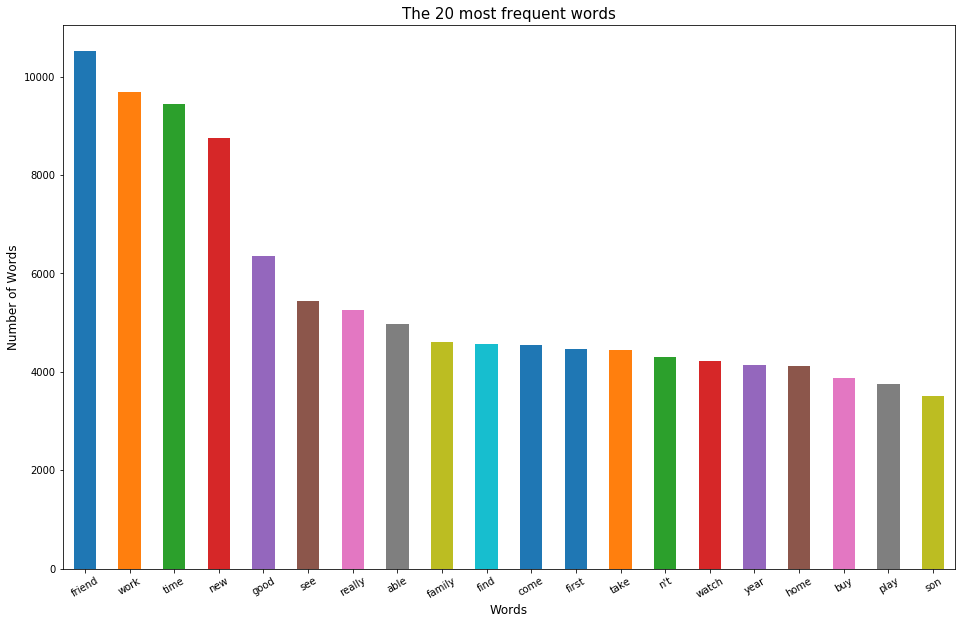

In [10]:
# count
plt.figure(figsize=(16,10))
hm_mix.value_counts(ascending=False)[:20].plot.bar()
plt.xticks(rotation = 30)
plt.xlabel('Words', fontsize=12)
plt.ylabel('Number of Words', fontsize=12)
plt.title('The 20 most frequent words', fontsize=15)

In [11]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(stopwords=STOPWORDS, max_words=50, background_color="white")
wordcloud2 = wordcloud.generate_from_frequencies(dict(hm_mix.value_counts()))

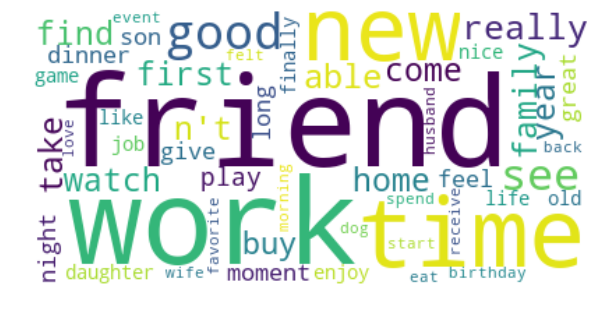

In [12]:
plt.figure(figsize=(10,8))
plt.imshow(wordcloud2, interpolation='bilinear')
plt.axis('off')
plt.show()

In [13]:
wordcloud2.to_file('../figs/wordcloud2.png')